<a href="https://colab.research.google.com/github/budityw23/spheres-data-generator/blob/main/Vaccine_Coverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define kecamatan and desa in Bantul
kecamatan = [
    "Bantul", "Pajangan", "Kasihan", "Srandakan", "Sanden", "Kretek", "Pundong", "Bambanglipuro",
    "Pandak", "Jetis", "Imogiri", "Dlingo", "Banguntapan", "Pleret", "Piyungan", "Sewon", "Sedayu"
]

desa_data = {
    "Bambanglipuro": ["Sidomulyo", "Sumbermulyo", "Mulyodadi"],
    "Banguntapan": ["Banguntapan", "Baturetno", "Jagalan", "Jambidan", "Potorono", "Singosaren", "Tamanan", "Wirokerten"],
    "Bantul": ["Bantul", "Palbapang", "Ringinharjo", "Sabdodadi", "Trirenggo"],
    "Dlingo": ["Dlingo", "Jatimulyo", "Mangunan", "Muntuk", "Temuwuh", "Terong"],
    "Imogiri": ["Girirejo", "Imogiri", "Karangtalun", "Karangtengah", "Kebonagung", "Selopamioro", "Sriharjo", "Wukirsari"],
    "Jetis": ["Canden", "Patalan", "Sumberagung", "Trimulyo"],
    "Kasihan": ["Bangunjiwo", "Ngestiharjo", "Tamantirto", "Tirtonirmolo"],
    "Kretek": ["Donotirto", "Parangtritis", "Tirtohargo", "Tirtomulyo", "Tirtosari"],
    "Pajangan": ["Guwosari", "Sendangsari", "Triwidadi"],
    "Pandak": ["Caturharjo", "Gilangharjo", "Triharjo", "Wijirejo"],
    "Piyungan": ["Sitimulyo", "Srimartani", "Srimulyo"],
    "Pleret": ["Bawuran", "Pleret", "Segoroyoso", "Wonokromo", "Wonolelo"],
    "Pundong": ["Panjangrejo", "Seloharjo", "Srihardono"],
    "Sanden": ["Gadingsari", "Gadingharjo", "Murtigading", "Srigading"],
    "Sedayu": ["Argodadi", "Argomulyo", "Argorejo", "Argosari"],
    "Sewon": ["Bangunharjo", "Pendowoharjo", "Timbulharjo", "Panggungharjo"],
    "Srandakan": ["Poncosari", "Trimurti"]
}

# Generate Posyandu per Desa
desa_posyandu_map = {}
for kec, desa_list in desa_data.items():
    for desa in desa_list:
        num_posyandu = random.randint(1, 3)  # 1 to 3 Posyandu per Desa
        posyandu_list = [f"{desa} {chr(65 + i)}" for i in range(num_posyandu)]  # A, B, C
        desa_posyandu_map[desa] = posyandu_list

# Define vaccine schedule
vaccine_schedule = {
    "Hepatitis B0": 0, "Hepatitis B1": 2, "Hepatitis B2": 3, "Hepatitis B3": 4,
    "Polio0": 0, "Polio1": 2, "Polio2": 3, "Polio3": 4,
    "BCG": 0, "DTP0": 2, "DTP1": 3, "DTP2": 4,
    "HIB0": 2, "HIB1": 3, "HIB2": 4, "MR": 9
}

# Define vaccination coverage percentages
vaccine_coverage = {"BCG": 60}
for vaccine in vaccine_schedule:
    if vaccine != "BCG":
        vaccine_coverage[vaccine] = random.randint(80, 90)

# Generate sample baby data
num_samples = 15000
current_date = datetime.now()

previous_month = 10
baby_data = []
for i in range(1, num_samples + 1):

    age_in_months = random.randint(0, previous_month)  # Adjusted to 10 months to include MR vaccine
    birth_date = current_date - timedelta(weeks=age_in_months * 4)
    selected_kecamatan = random.choice(kecamatan)
    selected_desa = random.choice(desa_data[selected_kecamatan])
    selected_posyandu = random.choice(desa_posyandu_map[selected_desa])
    vaccinated_at = random.choice(["Puskesmas", "Posyandu"])

    baby = {
        "No": i,
        "NIK Bayi": random.randint(100000, 999999),
        "Nama": f"Baby {i}",
        "Tanggal Lahir": birth_date.strftime("%d %B %Y"),
        "Usia (bulan)": age_in_months,
        "Puskesmas": selected_kecamatan,
        "Desa": selected_desa,
        "Posyandu": selected_posyandu,  # Adjusted to random Posyandu in Desa
        "Vaccinated At": vaccinated_at
    }

    for vaccine, age in vaccine_schedule.items():
        if age <= age_in_months and random.randint(1, 100) <= vaccine_coverage[vaccine]:
            vaccine_date = birth_date + timedelta(weeks=age * 4)
            baby[vaccine] = vaccine_date.strftime("%B %Y")
            baby[f"{vaccine} Age"] = age
        else:
            baby[vaccine] = ""
            baby[f"{vaccine} Age"] = ""

    baby_data.append(baby)

# Convert to DataFrame and sort by Puskesmas
columns = ["No", "NIK Bayi", "Nama", "Tanggal Lahir", "Usia (bulan)", "Puskesmas", "Desa", "Posyandu", "Vaccinated At"] + list(vaccine_schedule.keys()) + [f"{v} Age" for v in vaccine_schedule.keys()]
df = pd.DataFrame(baby_data, columns=columns)

# Sort by Puskesmas (Kecamatan) first, then Desa
df = df.sort_values(by=["Puskesmas", "Desa","Posyandu"]).reset_index(drop=True)
df["No"] = range(1, len(df) + 1)  # Reassign sequential numbering


# Generate file name with current date
file_name = f"/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_{num_samples}_{current_date.strftime('%Y-%m-%d')}_{previous_month}.csv"
df.to_csv(file_name, index=False)
print(f"Dummy vaccine data generated and saved as '{file_name}'")


Dummy vaccine data generated and saved as '/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10.csv'


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define kecamatan and desa in Bantul
kecamatan = [
    "Bantul", "Pajangan", "Kasihan", "Srandakan", "Sanden", "Kretek", "Pundong", "Bambanglipuro",
    "Pandak", "Jetis", "Imogiri", "Dlingo", "Banguntapan", "Pleret", "Piyungan", "Sewon", "Sedayu"
]

desa_data = {
    "Bambanglipuro": ["Sidomulyo", "Sumbermulyo", "Mulyodadi"],
    "Banguntapan": ["Banguntapan", "Baturetno", "Jagalan", "Jambidan", "Potorono", "Singosaren", "Tamanan", "Wirokerten"],
    "Bantul": ["Bantul", "Palbapang", "Ringinharjo", "Sabdodadi", "Trirenggo"],
    "Dlingo": ["Dlingo", "Jatimulyo", "Mangunan", "Muntuk", "Temuwuh", "Terong"],
    "Imogiri": ["Girirejo", "Imogiri", "Karangtalun", "Karangtengah", "Kebonagung", "Selopamioro", "Sriharjo", "Wukirsari"],
    "Jetis": ["Canden", "Patalan", "Sumberagung", "Trimulyo"],
    "Kasihan": ["Bangunjiwo", "Ngestiharjo", "Tamantirto", "Tirtonirmolo"],
    "Kretek": ["Donotirto", "Parangtritis", "Tirtohargo", "Tirtomulyo", "Tirtosari"],
    "Pajangan": ["Guwosari", "Sendangsari", "Triwidadi"],
    "Pandak": ["Caturharjo", "Gilangharjo", "Triharjo", "Wijirejo"],
    "Piyungan": ["Sitimulyo", "Srimartani", "Srimulyo"],
    "Pleret": ["Bawuran", "Pleret", "Segoroyoso", "Wonokromo", "Wonolelo"],
    "Pundong": ["Panjangrejo", "Seloharjo", "Srihardono"],
    "Sanden": ["Gadingsari", "Gadingharjo", "Murtigading", "Srigading"],
    "Sedayu": ["Argodadi", "Argomulyo", "Argorejo", "Argosari"],
    "Sewon": ["Bangunharjo", "Pendowoharjo", "Timbulharjo", "Panggungharjo"],
    "Srandakan": ["Poncosari", "Trimurti"]
}

# Generate Posyandu per Desa
desa_posyandu_map = {}
for kec, desa_list in desa_data.items():
    for desa in desa_list:
        num_posyandu = random.randint(1, 3)
        posyandu_list = [f"{desa} {chr(65 + i)}" for i in range(num_posyandu)]
        desa_posyandu_map[desa] = posyandu_list

# Define vaccine schedule
vaccine_schedule = {
    "Hepatitis B0": 0, "Hepatitis B1": 2, "Hepatitis B2": 3, "Hepatitis B3": 4,
    "Polio0": 0, "Polio1": 2, "Polio2": 3, "Polio3": 4,
    "BCG": 0, "DTP0": 2, "DTP1": 3, "DTP2": 4,
    "HIB0": 2, "HIB1": 3, "HIB2": 4, "MR": 9
}

hexavalent_groups = [
    ["Hepatitis B1", "Polio1", "DTP0", "HIB0"],
    ["Hepatitis B2", "Polio2", "DTP1", "HIB1"],
    ["Hepatitis B3", "Polio3", "DTP2", "HIB2"]
]

# Define specific coverage for certain vaccines
vaccine_coverage = {
    "BCG": 60,
    "Hepatitis B0": 87,
    "Polio0": 88,
    "MR": 89
}

# Set random coverage (90-95%) for all other vaccines
for vaccine in vaccine_schedule:
    if vaccine not in vaccine_coverage:
        vaccine_coverage[vaccine] = random.randint(90, 95)

# Generate sample baby data
num_samples = 15000
current_date = datetime.now()

previous_month = 10
baby_data = []
for i in range(1, num_samples + 1):
    age_in_months = random.randint(0, previous_month)
    birth_date = current_date - timedelta(weeks=age_in_months * 4)
    selected_kecamatan = random.choice(kecamatan)
    selected_desa = random.choice(desa_data[selected_kecamatan])
    selected_posyandu = random.choice(desa_posyandu_map[selected_desa])
    vaccinated_at = random.choice(["Puskesmas", "Posyandu"])

    baby = {
        "No": i,
        "NIK Bayi": random.randint(100000, 999999),
        "Nama": f"Baby {i}",
        "Tanggal Lahir": birth_date.strftime("%d %B %Y"),
        "Usia (bulan)": age_in_months,
        "Puskesmas": selected_kecamatan,
        "Desa": selected_desa,
        "Posyandu": selected_posyandu,
        "Vaccinated At": vaccinated_at
    }

    last_vaccine_month = None
    for vaccine in vaccine_schedule:
        if vaccine not in sum(hexavalent_groups, []):
            if vaccine_schedule[vaccine] <= age_in_months and random.randint(1, 100) <= vaccine_coverage[vaccine]:
                vaccine_date = birth_date + timedelta(weeks=vaccine_schedule[vaccine] * 4)
                baby[vaccine] = vaccine_date.strftime("%B %Y")
                baby[f"{vaccine} Age"] = vaccine_schedule[vaccine]
            else:
                baby[vaccine] = ""
                baby[f"{vaccine} Age"] = ""

    for group in hexavalent_groups:
      if any(random.randint(1, 100) > 97 for v in group):
          delay = 0
      else:
          delay = 0

      vaccine_month = max(vaccine_schedule[group[0]], last_vaccine_month + 1 if last_vaccine_month is not None else 0) + delay
      last_vaccine_month = vaccine_month

      # Determine if the entire group passes the coverage check
      group_coverage_passes = all(random.randint(1, 100) <= vaccine_coverage[vaccine] for vaccine in group)

      for vaccine in group:
          # Now check both age and coverage probability
          if vaccine_month <= age_in_months and group_coverage_passes:
              vaccine_date = birth_date + timedelta(weeks=vaccine_month * 4)
              baby[vaccine] = vaccine_date.strftime("%B %Y")
              baby[f"{vaccine} Age"] = vaccine_month
          else:
              baby[vaccine] = ""
              baby[f"{vaccine} Age"] = ""

    baby_data.append(baby)

# Convert to DataFrame and sort by Puskesmas
columns = ["No", "NIK Bayi", "Nama", "Tanggal Lahir", "Usia (bulan)", "Puskesmas", "Desa", "Posyandu", "Vaccinated At"] + list(vaccine_schedule.keys()) + [f"{v} Age" for v in vaccine_schedule.keys()]
df = pd.DataFrame(baby_data, columns=columns)
df = df.sort_values(by=["Puskesmas", "Desa", "Posyandu"]).reset_index(drop=True)
df["No"] = range(1, len(df) + 1)

file_name = f"/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_{num_samples}_{current_date.strftime('%Y-%m-%d')}_{previous_month}_shift_month.csv"
df.to_csv(file_name, index=False)
print(f"Dummy vaccine data generated and saved as '{file_name}'")


Dummy vaccine data generated and saved as '/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv'


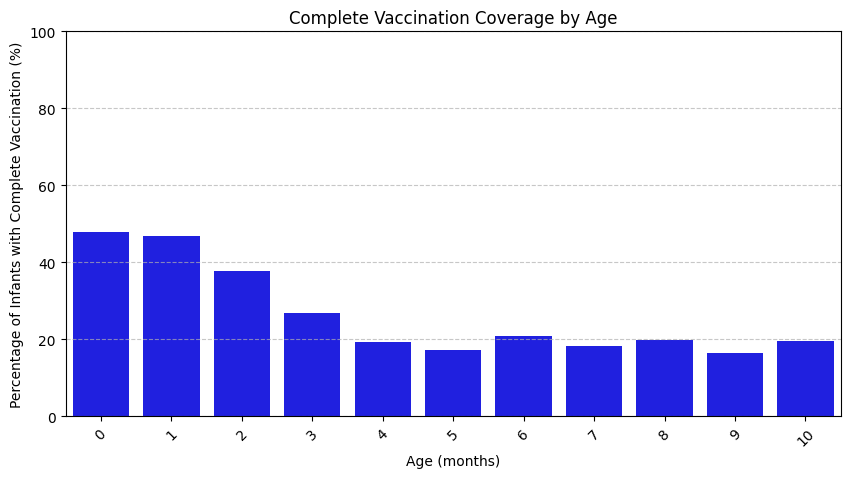

In [ ]:
# visualisasi vaccine coverage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Load dataset from CSV."""
    return pd.read_csv(file_path)

def process_data(df):
    """Add a column for complete vaccination status based on age and calculate complete vaccination coverage per age."""
    vaccines_per_age = {
        0: ["Hepatitis B0", "Polio0", "BCG"],
        1: ["Hepatitis B0", "Polio0", "BCG"],
        2: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0"],
        3: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1"],
        4: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2"],
        5: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2"],
        6: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2"],
        7: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2"],
        8: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2"],
        9: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2", "MR"],
        10: ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0", "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2", "MR"],
    }

    df["Complete_Vaccination"] = df.apply(lambda row: all(row[vaccines_per_age.get(row["Usia (bulan)"], [])].notna()), axis=1)
    return df.groupby("Usia (bulan)")["Complete_Vaccination"].mean() * 100

def plot_vaccine_coverage(vaccine_coverage):
    """Create a bar plot of complete vaccination coverage by age."""
    plt.figure(figsize=(10, 5))
    sns.barplot(x=vaccine_coverage.index, y=vaccine_coverage.values, color="b")

    plt.xlabel("Age (months)")
    plt.ylabel("Percentage of Infants with Complete Vaccination (%)")
    plt.title("Complete Vaccination Coverage by Age")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

"""Main function to run the entire process."""
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv"
df = load_data(file_path)
vaccine_coverage = process_data(df)
plot_vaccine_coverage(vaccine_coverage)


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, HTML

def load_taken_vaccine_data(file_path):
    """Load dataset from CSV."""
    return pd.read_csv(file_path)

def calculate_vaccine_taken_coverage(df, vaccines):
    """Calculate the percentage of the population that has received specific vaccines."""
    coverage = {}
    total_population = len(df)
    for vaccine in vaccines:
        coverage[vaccine] = (df[vaccine].notna().sum() / total_population) * 100
    return coverage

def plot_vaccine_taken_coverage(df):
    """Display a bar chart of the percentage of the population that has received vaccines."""
    vaccines = ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0",
                "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2", "MR"]

    coverage = calculate_vaccine_taken_coverage(df, vaccines)

    fig = go.Figure(data=[
        go.Bar(x=list(coverage.keys()), y=list(coverage.values()), marker_color='blue')
    ])

    fig.update_layout(
        title="Percentage of Population That Has Received Vaccines",
        xaxis_title="Vaccine Type",
        yaxis_title="Percentage (%)",
        yaxis=dict(range=[0, 100]),
        bargap=0.3
    )

    fig.show()

"""Main function to run the process."""
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv"
df = load_taken_vaccine_data(file_path)
plot_vaccine_taken_coverage(df)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def load_vaccination_status_data(file_path):
    """Load dataset from CSV."""
    return pd.read_csv(file_path)

def filter_vaccinated_children(df, vaccine_group, min_age):
    """Filter children who have received specific vaccines based on minimum age."""
    eligible_df = df[df['Usia (bulan)'] > min_age]
    vaccinated_count = eligible_df[df[vaccine_group].notna().all(axis=1)].shape[0]
    total_count = eligible_df.shape[0]
    return (vaccinated_count / total_count * 100) if total_count > 0 else 0

def plot_vaccination_status(df):
    """Display a bar chart of the percentage of children who have been vaccinated according to age groups."""
    vaccine_groups = {
        "MR (>9 months)": (["MR"], 9),
        "Hepatitis B3 (>4 months)": (["Hepatitis B3"], 4),
        "Polio3 (>4 months)": (["Polio3"], 4),
        "DTP2 (>4 months)": (["DTP2"], 4),
        "HIB2 (>4 months)": (["HIB2"], 4),
        "Hepatitis B2 (>3 months)": (["Hepatitis B2"], 3),
        "Polio2 (>3 months)": (["Polio2"], 3),
        "DTP1 (>3 months)": (["DTP1"], 3),
        "HIB1 (>3 months)": (["HIB1"], 3),
        "Hepatitis B1 (>2 months)": (["Hepatitis B1"], 2),
        "Polio1 (>2 months)": (["Polio1"], 2),
        "DTP0 (>2 months)": (["DTP0"], 2),
        "HIB0 (>2 months)": (["HIB0"], 2),
        "Hepatitis B0 (>0 months)": (["Hepatitis B0"], 0),
        "Polio0 (>0 months)": (["Polio0"], 0),
        "BCG (>0 months)": (["BCG"], 0)
    }

    categories = []
    values = []

    for label, (vaccines, min_age) in vaccine_groups.items():
        percentage = filter_vaccinated_children(df, vaccines, min_age)
        categories.append(label)
        values.append(percentage)

    fig = go.Figure(data=[
        go.Bar(x=categories, y=values, marker_color='blue', text=[f'{v:.2f}%' for v in values], textposition='auto')
    ])

    fig.update_layout(
        title="Percentage of Children Who Have Received Vaccines by Age",
        xaxis_title="Vaccine Group",
        yaxis_title="Percentage of Children (%)",
        bargap=0.3
    )

    fig.show()


"""Main function to run the process."""
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv"  # Replace with the correct CSV file path
df = load_vaccination_status_data(file_path)
plot_vaccination_status(df)

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-81-535d03601bfe>:11: UserWarning:

Boolean Series key will be reindexed t

In [ ]:
import pandas as pd
import plotly.graph_objects as go

def load_vaccination_data(file_path):
    """Reads vaccination dataset from a CSV file."""
    return pd.read_csv(file_path)

def calculate_vaccination_percentage(df, vaccine_name, exact_age):
    """Calculates the percentage of children who received a specific vaccine at the exact age."""
    total_population = len(df[df['Usia (bulan)'] == exact_age])
    vaccinated_count = len(df[(df['Usia (bulan)'] == exact_age) & df[vaccine_name].notna()])
    result = (vaccinated_count / total_population * 100) if total_population > 0 else 0
    print(f"Vaccine: {vaccine_name}, Age: {exact_age} months, Vaccinated: {vaccinated_count}, Total: {total_population}, Result: {result}")
    return result

def plot_vaccination_percentage(df):
    """Creates a visualization of the percentage of children who have received vaccines at the exact age."""
    vaccine_groups = {
        "MR (9 months)": ("MR", 9),
        "Hepatitis B3 (4 months)": ("Hepatitis B3", 4),
        "Polio3 (4 months)": ("Polio3", 4),
        "DTP2 (4 months)": ("DTP2", 4),
        "HIB2 (4 months)": ("HIB2", 4),
        "Hepatitis B2 (3 months)": ("Hepatitis B2", 3),
        "Polio2 (3 months)": ("Polio2", 3),
        "DTP1 (3 months)": ("DTP1", 3),
        "HIB1 (3 months)": ("HIB1", 3),
        "Hepatitis B1 (2 months)": ("Hepatitis B1", 2),
        "Polio1 (2 months)": ("Polio1", 2),
        "DTP0 (2 months)": ("DTP0", 2),
        "HIB0 (2 months)": ("HIB0", 2),
        "Hepatitis B0 (0 months)": ("Hepatitis B0", 0),
        "Polio0 (0 months)": ("Polio0", 0),
        "BCG (0 months)": ("BCG", 0)
    }

    categories = []
    values = []

    for label, (vaccine, exact_age) in vaccine_groups.items():
        percentage = calculate_vaccination_percentage(df, vaccine, exact_age)
        categories.append(label)
        values.append(percentage)

    fig = go.Figure(data=[
        go.Bar(x=categories, y=values, marker_color='blue')
    ])

    fig.update_layout(
        title="Percentage of Children Vaccinated at the Exact Age",
        xaxis_title="Vaccine Type",
        yaxis_title="Percentage (%)",
        bargap=0.3
    )

    fig.show()

# Run the main process
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv"  # Replace with the correct CSV file path

df = load_vaccination_data(file_path)
plot_vaccination_percentage(df)


Vaccine: MR, Age: 9 months, Vaccinated: 1237, Total: 1404, Result: 88.1054131054131
Vaccine: Hepatitis B3, Age: 4 months, Vaccinated: 975, Total: 1347, Result: 72.38307349665925
Vaccine: Polio3, Age: 4 months, Vaccinated: 975, Total: 1347, Result: 72.38307349665925
Vaccine: DTP2, Age: 4 months, Vaccinated: 975, Total: 1347, Result: 72.38307349665925
Vaccine: HIB2, Age: 4 months, Vaccinated: 975, Total: 1347, Result: 72.38307349665925
Vaccine: Hepatitis B2, Age: 3 months, Vaccinated: 1000, Total: 1319, Result: 75.8150113722517
Vaccine: Polio2, Age: 3 months, Vaccinated: 1000, Total: 1319, Result: 75.8150113722517
Vaccine: DTP1, Age: 3 months, Vaccinated: 1000, Total: 1319, Result: 75.8150113722517
Vaccine: HIB1, Age: 3 months, Vaccinated: 1000, Total: 1319, Result: 75.8150113722517
Vaccine: Hepatitis B1, Age: 2 months, Vaccinated: 1098, Total: 1398, Result: 78.54077253218884
Vaccine: Polio1, Age: 2 months, Vaccinated: 1098, Total: 1398, Result: 78.54077253218884
Vaccine: DTP0, Age: 2 mo

In [ ]:
import pandas as pd

def load_vaccination_data(file_path):
    """Load dataset from CSV file."""
    return pd.read_csv(file_path)

def count_vaccinated_children(df, vaccine_name, min_age):
    """Count children who received a specific vaccine at min_age or older."""
    return df[(df['Usia (bulan)'] >= min_age) & df[vaccine_name].notna()].shape[0]

def count_population(df, min_age):
    """Count total population of children with min_age or older."""
    return df[df['Usia (bulan)'] >= min_age].shape[0]

def count_vaccinated_exact_age(df, vaccine_name, exact_age):
    """Count children who received a vaccine at an exact age."""
    return df[(df['Usia (bulan)'] == exact_age) & df[vaccine_name].notna()].shape[0]

def count_population_exact_age(df, exact_age):
    """Count total population of children at an exact age."""
    return df[df['Usia (bulan)'] == exact_age].shape[0]

def generate_vaccination_tables(df):
    """Generate tables for vaccinated children, population, and percentage."""

    vaccines = ["Hepatitis B0", "Polio0", "BCG", "Hepatitis B1", "Polio1", "DTP0", "HIB0",
                "Hepatitis B2", "Polio2", "DTP1", "HIB1", "Hepatitis B3", "Polio3", "DTP2", "HIB2", "MR"]

    age_range = range(0, 11)  # From 0 months to 10 months

    # Initialize DataFrames
    total_vaccinated = pd.DataFrame(index=vaccines, columns=[f"≥ {age} mo" for age in age_range])
    denominator = pd.DataFrame(index=["Population"], columns=[f"≥ {age} mo" for age in age_range])
    exact_vaccinated = pd.DataFrame(index=vaccines, columns=[f"= {age} mo" for age in age_range])
    exact_population = pd.DataFrame(index=["Population"], columns=[f"= {age} mo" for age in age_range])

    # Fill tables
    for age in age_range:
        denominator.loc["Population", f"≥ {age} mo"] = count_population(df, age)
        exact_population.loc["Population", f"= {age} mo"] = count_population_exact_age(df, age)
        for vaccine in vaccines:
            total_vaccinated.loc[vaccine, f"≥ {age} mo"] = count_vaccinated_children(df, vaccine, age)
            exact_vaccinated.loc[vaccine, f"= {age} mo"] = count_vaccinated_exact_age(df, vaccine, age)

    # Calculate percentage
    percentage_vaccinated = (total_vaccinated / denominator.loc["Population"]) * 100

    # Calculate percentage exact
    exact_percentage_vaccinated = (exact_vaccinated / exact_population.loc["Population"]) * 100

    # Display tables
    print("\n📊 **Total Vaccinated (Cumulative Age)**")
    display(total_vaccinated)

    print("\n📊 **Denominator (Cumulative Age)**")
    display(denominator)

    print("\n📊 **Percentage of Vaccinated Children**")
    display(percentage_vaccinated)

    print("\n📊 **Total Vaccinated (Exact Age)**")
    display(exact_vaccinated)

    print("\n📊 **Denominator (Exact Age)**")
    display(exact_population)

    print("\n📊 **Percentage of exact Vaccinated Children**")
    display(exact_percentage_vaccinated)


# Load dataset and generate tables
file_path = "/content/drive/MyDrive/Colab Notebooks/Data Spheres/generated_vaccine_data_15000_2025-03-12_10_shift_month.csv"
df = load_vaccination_data(file_path)
generate_vaccination_tables(df)



📊 **Total Vaccinated (Cumulative Age)**


,≥ 0 mo,≥ 1 mo,≥ 2 mo,≥ 3 mo,≥ 4 mo,≥ 5 mo,≥ 6 mo,≥ 7 mo,≥ 8 mo,≥ 9 mo,≥ 10 mo
Hepatitis B0,13129,11850,10619,9383,8257,7079,5944,4755,3623,2406,1193
Polio0,13183,11917,10688,9454,8303,7131,5989,4800,3645,2418,1198
BCG,9083,8232,7377,6525,5713,4879,4127,3321,2505,1671,819
Hepatitis B1,9297,9297,9297,8199,7221,6190,5213,4181,3171,2104,1041
Polio1,9297,9297,9297,8199,7221,6190,5213,4181,3171,2104,1041
DTP0,9297,9297,9297,8199,7221,6190,5213,4181,3171,2104,1041
HIB0,9297,9297,9297,8199,7221,6190,5213,4181,3171,2104,1041
Hepatitis B2,8167,8167,8167,8167,7167,6123,5143,4124,3137,2090,1042
Polio2,8167,8167,8167,8167,7167,6123,5143,4124,3137,2090,1042
DTP1,8167,8167,8167,8167,7167,6123,5143,4124,3137,2090,1042



📊 **Denominator (Cumulative Age)**


,≥ 0 mo,≥ 1 mo,≥ 2 mo,≥ 3 mo,≥ 4 mo,≥ 5 mo,≥ 6 mo,≥ 7 mo,≥ 8 mo,≥ 9 mo,≥ 10 mo
Population,15000,13570,12171,10773,9454,8107,6816,5472,4151,2755,1351



📊 **Percentage of Vaccinated Children**


,≥ 0 mo,≥ 1 mo,≥ 2 mo,≥ 3 mo,≥ 4 mo,≥ 5 mo,≥ 6 mo,≥ 7 mo,≥ 8 mo,≥ 9 mo,≥ 10 mo
Hepatitis B0,87.526667,87.324982,87.248377,87.097373,87.338693,87.3196,87.206573,86.89693,87.280173,87.332123,88.304959
Polio0,87.886667,87.818718,87.815299,87.756428,87.825259,87.961021,87.866784,87.719298,87.810166,87.767695,88.675056
BCG,60.553333,60.663228,60.611289,60.568087,60.429448,60.182558,60.548709,60.690789,60.346904,60.653358,60.621762
Hepatitis B1,61.98,68.511422,76.386492,76.106934,76.380368,76.353768,76.481808,76.407164,76.391231,76.370236,77.054034
Polio1,61.98,68.511422,76.386492,76.106934,76.380368,76.353768,76.481808,76.407164,76.391231,76.370236,77.054034
DTP0,61.98,68.511422,76.386492,76.106934,76.380368,76.353768,76.481808,76.407164,76.391231,76.370236,77.054034
HIB0,61.98,68.511422,76.386492,76.106934,76.380368,76.353768,76.481808,76.407164,76.391231,76.370236,77.054034
Hepatitis B2,54.446667,60.18423,67.102128,75.809895,75.809181,75.527322,75.454812,75.365497,75.572151,75.862069,77.128053
Polio2,54.446667,60.18423,67.102128,75.809895,75.809181,75.527322,75.454812,75.365497,75.572151,75.862069,77.128053
DTP1,54.446667,60.18423,67.102128,75.809895,75.809181,75.527322,75.454812,75.365497,75.572151,75.862069,77.128053



📊 **Total Vaccinated (Exact Age)**


,= 0 mo,= 1 mo,= 2 mo,= 3 mo,= 4 mo,= 5 mo,= 6 mo,= 7 mo,= 8 mo,= 9 mo,= 10 mo
Hepatitis B0,1279,1231,1236,1126,1178,1135,1189,1132,1217,1213,1193
Polio0,1266,1229,1234,1151,1172,1142,1189,1155,1227,1220,1198
BCG,851,855,852,812,834,752,806,816,834,852,819
Hepatitis B1,0,0,1098,978,1031,977,1032,1010,1067,1063,1041
Polio1,0,0,1098,978,1031,977,1032,1010,1067,1063,1041
DTP0,0,0,1098,978,1031,977,1032,1010,1067,1063,1041
HIB0,0,0,1098,978,1031,977,1032,1010,1067,1063,1041
Hepatitis B2,0,0,0,1000,1044,980,1019,987,1047,1048,1042
Polio2,0,0,0,1000,1044,980,1019,987,1047,1048,1042
DTP1,0,0,0,1000,1044,980,1019,987,1047,1048,1042



📊 **Denominator (Exact Age)**


,= 0 mo,= 1 mo,= 2 mo,= 3 mo,= 4 mo,= 5 mo,= 6 mo,= 7 mo,= 8 mo,= 9 mo,= 10 mo
Population,1430,1399,1398,1319,1347,1291,1344,1321,1396,1404,1351



📊 **Percentage of exact Vaccinated Children**


,= 0 mo,= 1 mo,= 2 mo,= 3 mo,= 4 mo,= 5 mo,= 6 mo,= 7 mo,= 8 mo,= 9 mo,= 10 mo
Hepatitis B0,89.440559,87.991422,88.412017,85.367703,87.453601,87.916344,88.467262,85.692657,87.17765,86.396011,88.304959
Polio0,88.531469,87.848463,88.268956,87.263078,87.008166,88.458559,88.467262,87.433762,87.893983,86.894587,88.675056
BCG,59.51049,61.115082,60.944206,61.561789,61.915367,58.249419,59.970238,61.771385,59.74212,60.683761,60.621762
Hepatitis B1,0.0,0.0,78.540773,74.147081,76.54046,75.677769,76.785714,76.457229,76.432665,75.712251,77.054034
Polio1,0.0,0.0,78.540773,74.147081,76.54046,75.677769,76.785714,76.457229,76.432665,75.712251,77.054034
DTP0,0.0,0.0,78.540773,74.147081,76.54046,75.677769,76.785714,76.457229,76.432665,75.712251,77.054034
HIB0,0.0,0.0,78.540773,74.147081,76.54046,75.677769,76.785714,76.457229,76.432665,75.712251,77.054034
Hepatitis B2,0.0,0.0,0.0,75.815011,77.505568,75.910147,75.818452,74.716124,75.0,74.643875,77.128053
Polio2,0.0,0.0,0.0,75.815011,77.505568,75.910147,75.818452,74.716124,75.0,74.643875,77.128053
DTP1,0.0,0.0,0.0,75.815011,77.505568,75.910147,75.818452,74.716124,75.0,74.643875,77.128053
